In [139]:
import pandas as pd

In [140]:
# Load files into a pandas dataframe
train_values = pd.read_csv('./train_values.csv')
train_labels = pd.read_csv('./train_labels.csv')
test_values = pd.read_csv('./test_values.csv')
submission_format = pd.read_csv('../submission_format (1).csv')

In [141]:
merged_train = pd.merge(train_values, train_labels, on='building_id')

In [142]:
# Combining trained values with test values
combined_data = pd.concat([merged_train, test_values], ignore_index=True)
combined_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2.0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2.0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347464,310028,4,605,3623,3,70,20,6,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347465,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,NaN
347466,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347467,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,NaN


# Data Exploration and Cleaning

In [143]:
print(combined_data.head())
combined_data.dtypes

   building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...         

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area_percentage                             int64
height_percentage                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [144]:
combined_data[['building_id','damage_grade']]
# test_values.columns

,building_id,damage_grade
0,802906,3.0
1,28830,2.0
2,94947,3.0
3,590882,2.0
4,201944,3.0
...,...,...
347464,310028,NaN
347465,663567,NaN
347466,1049160,NaN
347467,442785,NaN


In [145]:
combined_data.isna().sum()

building_id                                   0
geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                        0
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick  

In [146]:
# Check for duplicates
duplicates = combined_data.duplicated()
print(duplicates.sum())

0


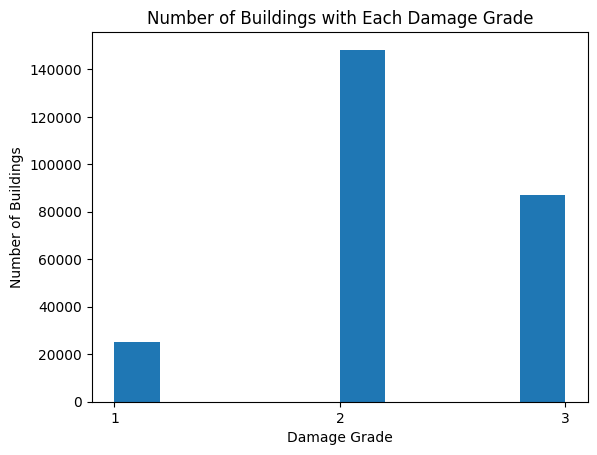

In [147]:
# Visualizing most damaged levels
import matplotlib.pyplot as plt

damage = combined_data['damage_grade']

plt.hist(damage)
plt.title('Number of Buildings with Each Damage Grade')
plt.xlabel('Damage Grade')
plt.xticks([1,2,3],['1','2','3'])
plt.ylabel('Number of Buildings')

plt.show()

In [148]:
print('It appears most buildings experienced level 2 damage')

It appears most buildings experienced level 2 damage


In [149]:
# Trying to see which features are objects
combined_data.select_dtypes(include=['object'])

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v
...,...,...,...,...,...,...,...,...
347464,t,r,q,f,q,t,d,w
347465,n,r,n,f,q,s,d,v
347466,t,r,n,f,j,s,d,v
347467,t,r,n,f,q,s,d,a


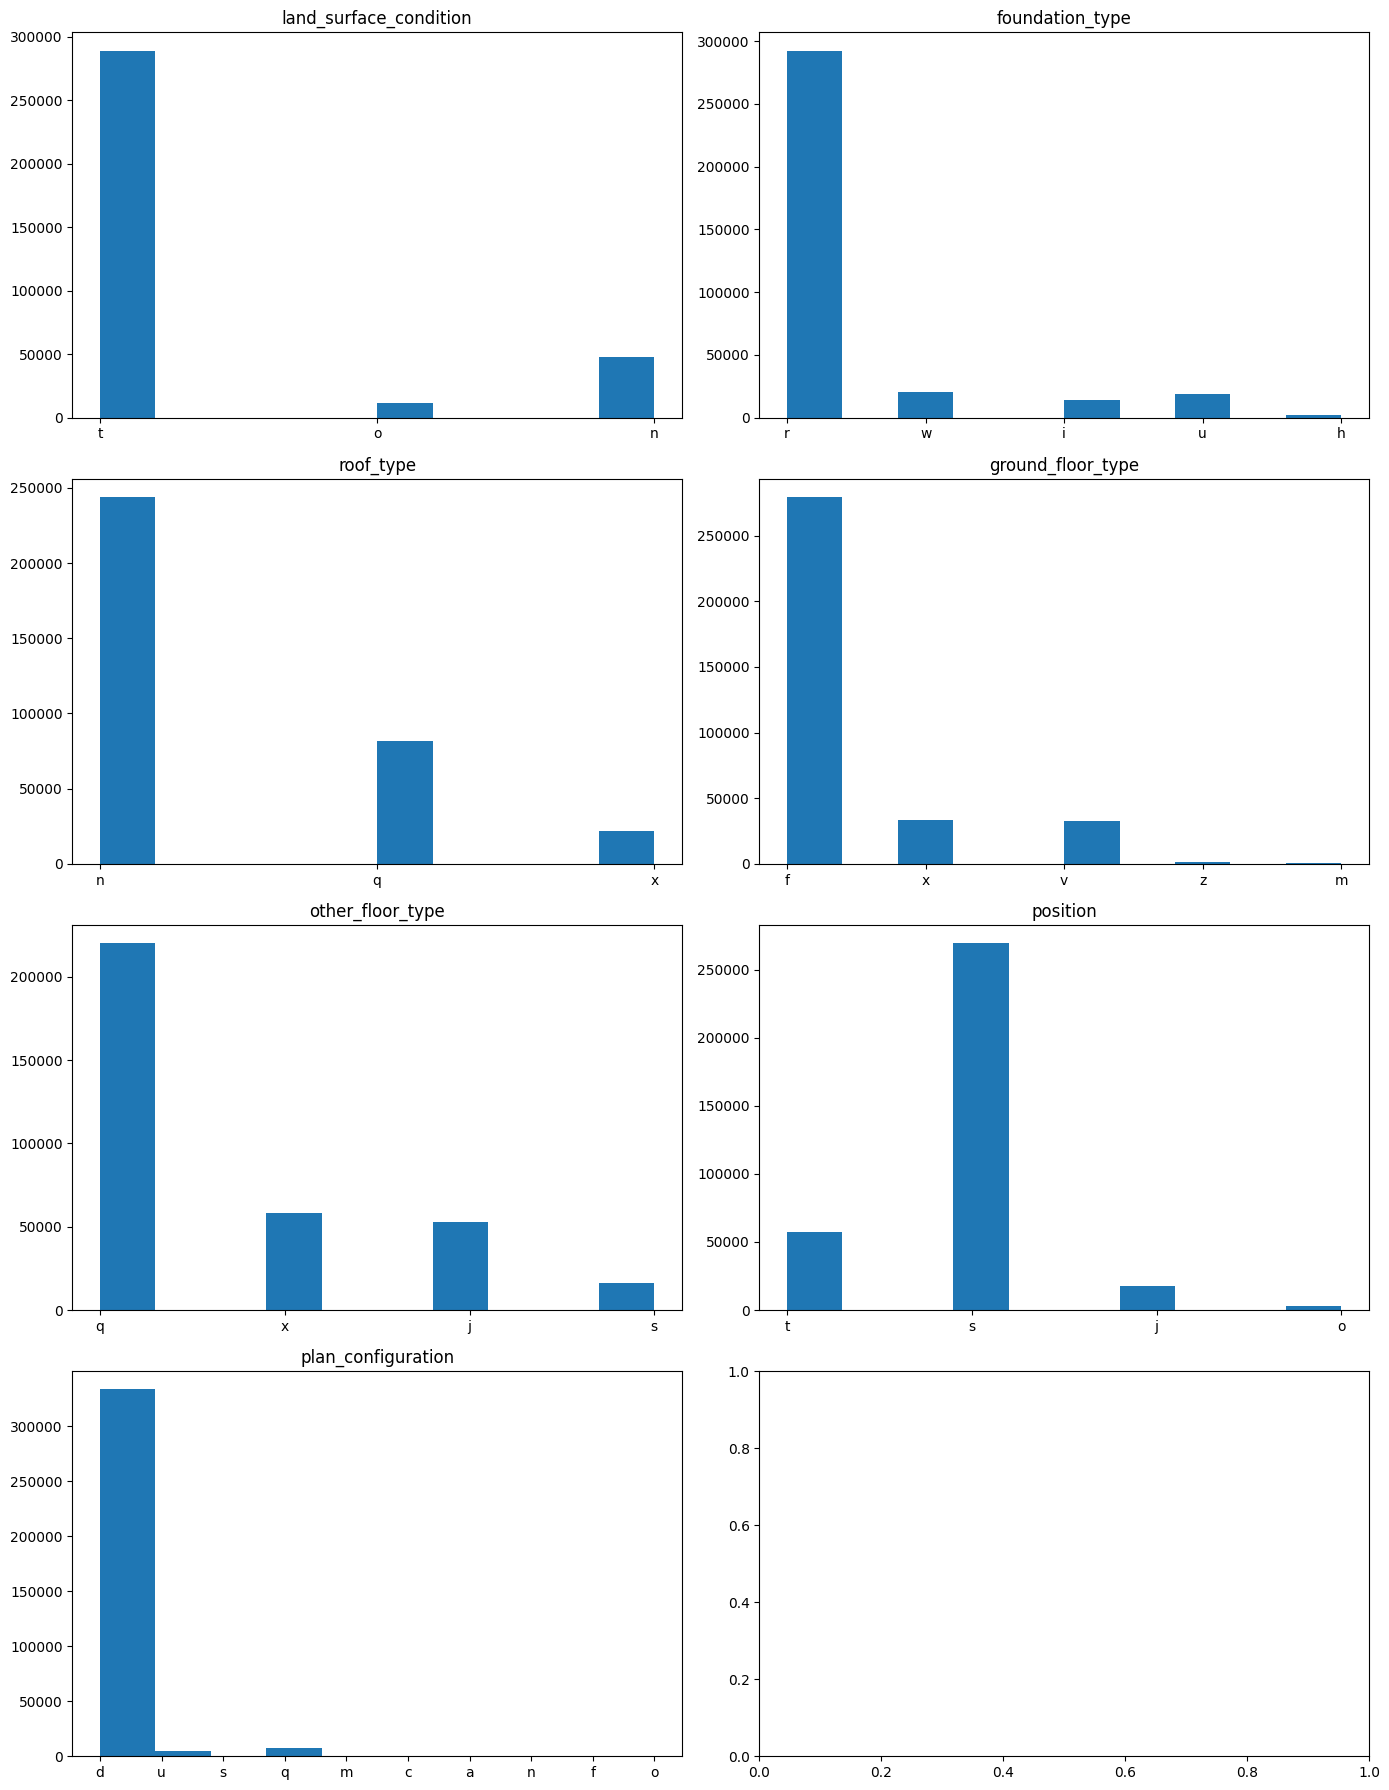

In [150]:
import matplotlib.pyplot as plt

# Creating a figure and axis for each variable
fig, axs = plt.subplots(4, 2, figsize=(14, 18))  # 4 rows, 2 columns

# Flatten the axis array for easier iteration
axs = axs.flatten()

# Plotting each variable as a histogram
variables = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
             'other_floor_type', 'position', 'plan_configuration']

for i, var in enumerate(variables):
    axs[i].hist(combined_data[var])
    axs[i].set_title(var)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [151]:
print('Since there are ascii variables, histograms were used to see which variable category appeared most frequently')

Since there are ascii variables, histograms were used to see which variable category appeared most frequently


# Preprocessing Data

First, we need to hot_encode the variables; including the ascii ones

In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Initialize label encoder and one-hot encoder
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False to get a non-sparse matrix

# Create a copy of the DataFrame to avoid modifying the original DataFrame within the loop
combined_data_encoded = combined_data.copy()
combined_data_encoded = combined_data_encoded.drop(columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])

# Iterate over each categorical variable and apply encoding
for column in combined_data.columns:
    if combined_data[column].dtype == 'object':  # Check if the column is categorical
        # Use label encoding
        combined_data_encoded[column + '_label_encoded'] = label_encoder.fit_transform(combined_data[column])

        # Use one-hot encoding
        one_hot_encoded_array = one_hot_encoder.fit_transform(combined_data_encoded[[column]])
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=[f"{column}_{int(i)}" for i in range(one_hot_encoded_array.shape[1])])
        combined_data_encoded = pd.concat([combined_data_encoded, one_hot_encoded_df], axis=1)

        # Drop the original categorical column and the label encoded column
        combined_data_encoded.drop([column, column + '_label_encoded'], axis=1, inplace=True)

# Now merged_train_encoded should have all categorical variables replaced with one-hot encoded columns
combined_data2 = combined_data_encoded

In [153]:
# Adding back columns
columns_to_add_back = combined_data[['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]

# Concatenate the extracted columns to the front of merged_train
combined_data = pd.concat([columns_to_add_back, combined_data_encoded], axis=1)

# Cleaned Data
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_4,plan_configuration_5,plan_configuration_6,plan_configuration_7,plan_configuration_8,plan_configuration_9,legal_ownership_status_0,legal_ownership_status_1,legal_ownership_status_2,legal_ownership_status_3
0,802906,6,487,12198,2,30,6,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28830,8,900,2812,2,10,8,7,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,94947,21,363,8973,2,10,5,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,590882,22,418,10694,2,10,6,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,201944,11,131,1488,3,30,8,9,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [154]:
# Creating a new feature
combined_data['volume'] = combined_data['area_percentage'] * combined_data['height_percentage']

combined_data['damage_grade']

0         3.0
1         2.0
2         3.0
3         2.0
4         3.0
         ... 
347464    NaN
347465    NaN
347466    NaN
347467    NaN
347468    NaN
Name: damage_grade, Length: 347469, dtype: float64

Using ensemble methods for optimal feature selection

# Train/Test Split 

In [155]:
# Split the data into training and testing sets
train_data = combined_data[combined_data['damage_grade'].notnull()]
test_data = combined_data[combined_data['damage_grade'].isnull()]

In [156]:
# Training the model, using Train_data. Will use Test Data to find damage_grade after 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Ensure 'damage_grade' is treated as categorical
train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')

# Training set
X = train_data.drop(columns=['damage_grade'])
y = train_data['damage_grade']


# Remap class labels to [0, 1, 2]
y = y.map({1: 0, 2: 1, 3: 2})


/var/folders/93/r_nbn0pj2jb1d097mhf6q5ww0000gn/T/ipykernel_31967/667966581.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')


In [157]:
y.head()

0    2
1    1
2    2
3    1
4    2
Name: damage_grade, dtype: category
Categories (3, int64): [0, 1, 2]

# Trying with XGBoost 

In [160]:
from sklearn.model_selection import train_test_split

# Define sample size
sample_size = 5000


# Sample the data
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, stratify=y, random_state=42)

# Check the shapes to confirm
print(X_sample.shape)
print(y_sample.shape)
print("Unique class labels in y_sample after remapping:", np.unique(y_sample))


(5000, 70)
(5000,)
Unique class labels in y_sample after remapping: [0 1 2]


In [161]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

def perform_rfecv(estimator, X_sample, y_sample, cv_folds=3):
    rfecv = RFECV(estimator=estimator, step=0.2, cv=StratifiedKFold(cv_folds), scoring='f1_micro', n_jobs=-1)
    rfecv.fit(X_sample, y_sample)
    
    optimal_num_features = rfecv.n_features_
    print(f"Optimal number of features: {optimal_num_features}")

    feature_ranking = pd.DataFrame({
        'Feature': X_sample.columns,
        'Ranking': rfecv.ranking_
    }).sort_values(by='Ranking')

    selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()
    print(f"Selected features: {selected_features}")

    print(feature_ranking)

    return selected_features, rfecv.ranking_, rfecv

# Apply feature selection
print("XGBoost Feature Selection (Boosting)")
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
selected_features_xgb, feature_ranking_xgb, rfecv_xgb = perform_rfecv(xgb, X_sample, y_sample, cv_folds=3)

# Ensure using sampled data
X_selected_xgb = X_sample[selected_features_xgb]

# Cross-validation for XGBoost with selected features
print("Cross-validation for XGBoost with selected features")
cross_val_scores_xgb = cross_val_score(xgb, X_selected_xgb, y_sample, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"XGBoost cross-validation F1-micro score: {cross_val_scores_xgb.mean()}")

XGBoost Feature Selection (Boosting)
Optimal number of features: 14
Selected features: ['has_superstructure_rc_engineered', 'foundation_type_4', 'ground_floor_type_2', 'other_floor_type_1', 'other_floor_type_3', 'foundation_type_2', 'plan_configuration_7', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'legal_ownership_status_0', 'foundation_type_1', 'has_superstructure_mud_mortar_stone', 'geo_level_1_id', 'has_superstructure_stone_flag']
                             Feature  Ranking
17  has_superstructure_rc_engineered        1
38                 foundation_type_4        1
44               ground_floor_type_2        1
48                other_floor_type_1        1
50                other_floor_type_3        1
..                               ...      ...
29      has_secondary_use_use_police        5
30           has_secondary_use_other        5
25          has_secondary_use_school        5
43               ground_floor_type_1        5
59              p

In [162]:

# XGBoost Feature Selection
print("XGBoost Feature Selection (Boosting)")
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
selected_features_xgb, feature_ranking_xgb, rfecv_xgb = perform_rfecv(xgb, X_sample, y_sample, cv_folds=3)

# Cross-validation for XGBoost
print("Cross-validation for XGBoost with selected features")
X_selected_xgb = X_sample[selected_features_xgb]
cross_val_scores_xgb = cross_val_score(xgb, X_selected_xgb, y_sample, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"XGBoost cross-validation F1-micro score: {cross_val_scores_xgb.mean()}")

XGBoost Feature Selection (Boosting)
Optimal number of features: 14
Selected features: ['has_superstructure_rc_engineered', 'foundation_type_4', 'ground_floor_type_2', 'other_floor_type_1', 'other_floor_type_3', 'foundation_type_2', 'plan_configuration_7', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'legal_ownership_status_0', 'foundation_type_1', 'has_superstructure_mud_mortar_stone', 'geo_level_1_id', 'has_superstructure_stone_flag']
                             Feature  Ranking
17  has_superstructure_rc_engineered        1
38                 foundation_type_4        1
44               ground_floor_type_2        1
48                other_floor_type_1        1
50                other_floor_type_3        1
..                               ...      ...
29      has_secondary_use_use_police        5
30           has_secondary_use_other        5
25          has_secondary_use_school        5
43               ground_floor_type_1        5
59              p

In [163]:
X_selected_xgb.columns

Index(['has_superstructure_rc_engineered', 'foundation_type_4',
       'ground_floor_type_2', 'other_floor_type_1', 'other_floor_type_3',
       'foundation_type_2', 'plan_configuration_7',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_mud_mortar_brick', 'legal_ownership_status_0',
       'foundation_type_1', 'has_superstructure_mud_mortar_stone',
       'geo_level_1_id', 'has_superstructure_stone_flag'],
      dtype='object')

In [164]:
# Initialize and fit the XGBoost model
best_xgb = XGBClassifier(n_estimators=100, random_state=42)
best_xgb.fit(X_selected_xgb, y_sample)

# Predictions for the train set
y_train_pred_xgb = best_xgb.predict(X_selected_xgb)

# Confusion matrix and classification report for the train set
print("Train Set Confusion Matrix:")
print(confusion_matrix(y_sample, y_train_pred_xgb))

print("Train Set Classification Report:")
print(classification_report(y_sample, y_train_pred_xgb))

# Calculate and print the accuracy for the train set
train_accuracy = accuracy_score(y_sample, y_train_pred_xgb)
print("Train Set Accuracy:", train_accuracy)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_xgb, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

# Re-train the XGBoost model on the training set
best_xgb.fit(X_train, y_train)

# Predictions for the test set
y_test_pred_xgb = best_xgb.predict(X_test)
y_test_pred_prob_xgb = best_xgb.predict_proba(X_test)

# Confusion matrix and classification report for the test set
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb))

print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))

# Calculate and print the accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)
print("Test Set Accuracy:", test_accuracy)

# Calculate and print AIC
def AIC_score(y_true, y_pred_prob, df):
    ll = log_loss(y_true, y_pred_prob)
    n = len(y_true)
    aic = 2 * df - 2 * (-n * ll)
    return aic

# Ensure y_pred_prob contains probabilities for log_loss calculation
aic_value = AIC_score(y_test, y_test_pred_prob_xgb, df=X_test.shape[1] + 1)
print('AIC:', aic_value)

Train Set Confusion Matrix:
[[ 239  236    7]
 [  67 2351  427]
 [   7  698  968]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.50      0.60       482
           1       0.72      0.83      0.77      2845
           2       0.69      0.58      0.63      1673

    accuracy                           0.71      5000
   macro avg       0.72      0.63      0.67      5000
weighted avg       0.71      0.71      0.71      5000

Train Set Accuracy: 0.7116
Test Set Confusion Matrix:
[[ 36  57   3]
 [ 29 430 110]
 [  2 154 179]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.38      0.44        96
           1       0.67      0.76      0.71       569
           2       0.61      0.53      0.57       335

    accuracy                           0.65      1000
   macro avg       0.61      0.56      0.57      1000
weighted avg       0.64      0.65      0.64  

In [165]:
# Select the same columns in test_data as in X_selected_rf using .loc
test_data_selected = test_data.loc[:, X_selected_xgb.columns]

# Append the damage_grade column to the end using .loc
test_data_selected.loc[:, 'damage_grade'] = test_data['damage_grade']



# test_data_selected.head()
X_selected_xgb.head()


,has_superstructure_rc_engineered,foundation_type_4,ground_floor_type_2,other_floor_type_1,other_floor_type_3,foundation_type_2,plan_configuration_7,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_brick,legal_ownership_status_0,foundation_type_1,has_superstructure_mud_mortar_stone,geo_level_1_id,has_superstructure_stone_flag
32812,0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0.0,0.0,1,22,0
198483,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,1,25,0
147660,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0,8,0
53502,0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.0,0.0,1,12,0
120515,0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0.0,0.0,1,17,0


In [178]:
# Remove the target column from the test set
test_data_features_only = test_data[X_selected_xgb.columns]

# Predict the labels for the test set using the trained model
y_test_pred = best_xgb.predict(test_data_features_only)

# Output the predictions
print(y_test_pred)


[2 1 1 ... 1 1 0]


In [179]:
# Reverse mapping if needed
reverse_mapping = {0: 1, 1: 2, 2: 3}
y_test_pred_reversed = pd.Series(y_test_pred).map(reverse_mapping)

# Ensure that y_test_pred_reversed is a 1-dimensional Series
print(y_test_pred_reversed)

0        3
1        2
2        2
3        1
4        3
        ..
86863    2
86864    2
86865    2
86866    2
86867    1
Length: 86868, dtype: int64


In [180]:
# # Assuming y_test_pred contains the predictions
# y_test_pred_series = pd.Series(y_test_pred)

# Count occurrences of each predicted class
predictions_counts = y_test_pred_reversed.value_counts().sort_index()

print("\nPrediction Counts:")
print(predictions_counts)


Prediction Counts:
1     6149
2    55393
3    25326
Name: count, dtype: int64


In [195]:
# Ensure 'building_id' column exists in 'test_data'
if 'building_id' not in test_data.columns:
    raise ValueError("Column 'building_id' is not found in the test_data DataFrame.")

# Ensure the lengths of 'building_id' and 'y_test_pred_reversed' match
if len(test_data) != len(y_test_pred_reversed):
    raise ValueError("Length of 'building_id' and predictions do not match.")

# Convert predictions to a 1-dimensional Series if needed
if isinstance(y_test_pred_reversed, np.ndarray) and y_test_pred_reversed.ndim > 1:
    y_test_pred_reversed = pd.Series(y_test_pred_reversed.flatten())

# Create DataFrame with 'building_id' and predicted values
predictions_df = pd.DataFrame({
    'building_id': test_data['building_id'].values,  # Ensure correct values
    'damage_grade': y_test_pred_reversed.values  # Ensure correct values
})

In [196]:
# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions_new.csv', index=False)

# Print the first few rows of the DataFrame to verify
print(predictions_df.head())

   building_id  damage_grade
0       300051             3
1        99355             2
2       890251             2
3       745817             1
4       421793             3


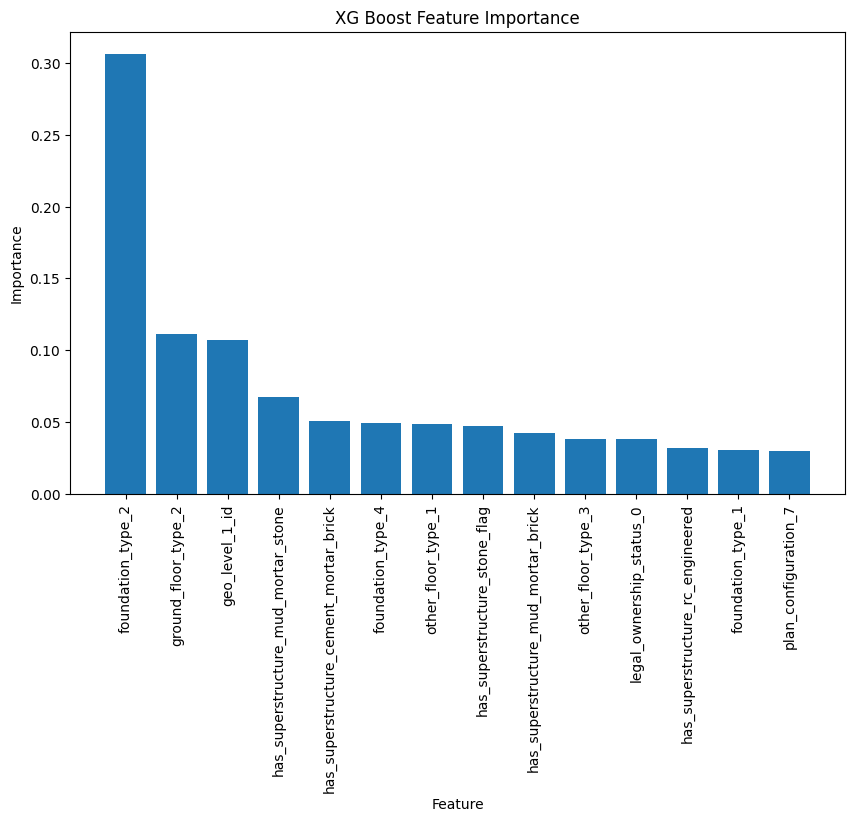

In [198]:
import matplotlib.pyplot as plt

# Get the feature importances
importances = best_xgb.feature_importances_

# Get the names of the features
feature_names = X_selected_xgb.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XG Boost Feature Importance')
plt.show()